### EDA Part 2 – Team-Level Insights

team
MI     3
RCB    2
CSK    2
KKR    2
SRH    1
Name: count, dtype: int64
winner
MI     2
KKR    2
SRH    1
Name: count, dtype: int64
###################
     Matches Played  Wins        Win%
KKR               2   2.0  100.000000
SRH               1   1.0  100.000000
MI                3   2.0   66.666667
CSK               2   0.0    0.000000
RCB               2   0.0    0.000000


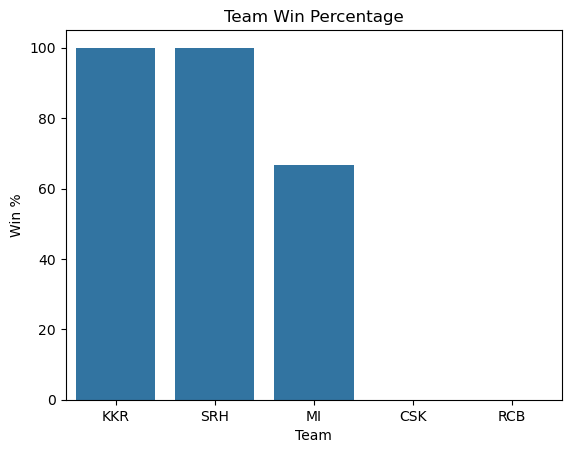

In [25]:
### Topic 1: Topic 1: Team Win Percentage

import pandas as pd

# Example dataframe
data = {
    'match_id': [1, 2, 3, 4, 5],
    'team1': ['MI', 'RCB', 'CSK', 'MI', 'KKR'],
    'team2': ['CSK', 'KKR', 'MI', 'SRH', 'RCB'],
    'winner': ['MI', 'KKR', 'MI', 'SRH', 'KKR']
}
df = pd.DataFrame(data)

# Step 4: Find total matches per team
matches_played = df[['team1']].rename(columns={'team1': 'team'})
matches_played = pd.concat([matches_played, df[['team2']].rename(columns={'team2': 'team'})])
team_matches = matches_played['team'].value_counts()
print(team_matches)
# Step 5: Find total wins per team
team_wins = df['winner'].value_counts()
print(team_wins)


#Step 6: Combine both & calculate win %
team_stats = pd.DataFrame({
    'Matches Played': team_matches,
    'Wins': team_wins
}).fillna(0)

team_stats['Win%'] = (team_stats['Wins']/team_stats['Matches Played']) * 100
team_stats = team_stats.sort_values(by='Win%',ascending= False)
print("###################")
print(team_stats)

# Step 7: Simple Bar Plot (optional)
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=team_stats.index, y=team_stats['Win%'])
plt.title('Team Win Percentage')
plt.ylabel('Win %')
plt.xlabel('Team')
plt.show()


### Topic 2: Toss Decision Analysis
Goal:
Find how toss decisions (batting first or chasing) affect win percentage for each team.

  toss_winner toss_decision  toss_match_win
0         CSK           bat             1.0
1         CSK         field             0.0
2          DC           bat             1.0
3          DC         field             1.0
4         KKR         field             1.0
5          MI           bat             1.0
6          MI         field             1.0
7         RCB         field             0.0
8         SRH           bat             1.0
9         SRH         field             1.0
  team toss_decision  win_percent
0  CSK           bat        100.0
1  CSK         field          0.0
2   DC           bat        100.0
3   DC         field        100.0
4  KKR         field        100.0
5   MI           bat        100.0
6   MI         field        100.0
7  RCB         field          0.0
8  SRH           bat        100.0
9  SRH         field        100.0


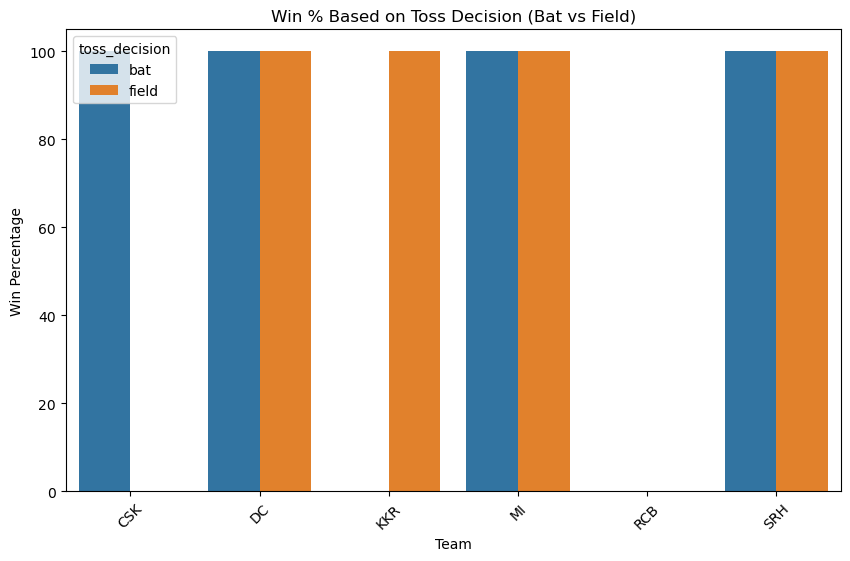

In [10]:
import pandas as pd
df = pd.read_csv('matches.csv')
df.head()
# Step 2: Create a new column → toss_match_win
df['toss_match_win'] = df['toss_winner'] == df['winner']
# Step 3: Group by team & toss decision
toss_analysis = (
    df.groupby(['toss_winner', 'toss_decision'])['toss_match_win']
    .mean()
    .reset_index()
)
print(toss_analysis)
toss_analysis.rename(columns={'toss_winner': 'team', 'toss_match_win': 'win_percent'}, inplace=True)
toss_analysis['win_percent'] *= 100  # Convert to percentage
print(toss_analysis)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=toss_analysis, x='team', y='win_percent', hue='toss_decision')

plt.title('Win % Based on Toss Decision (Bat vs Field)')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.show()



venue
M. Chinnaswamy Stadium    400.000000
Wankhede Stadium          351.666667
Eden Gardens              316.666667
Narendra Modi Stadium     302.500000
Name: total_runs, dtype: float64


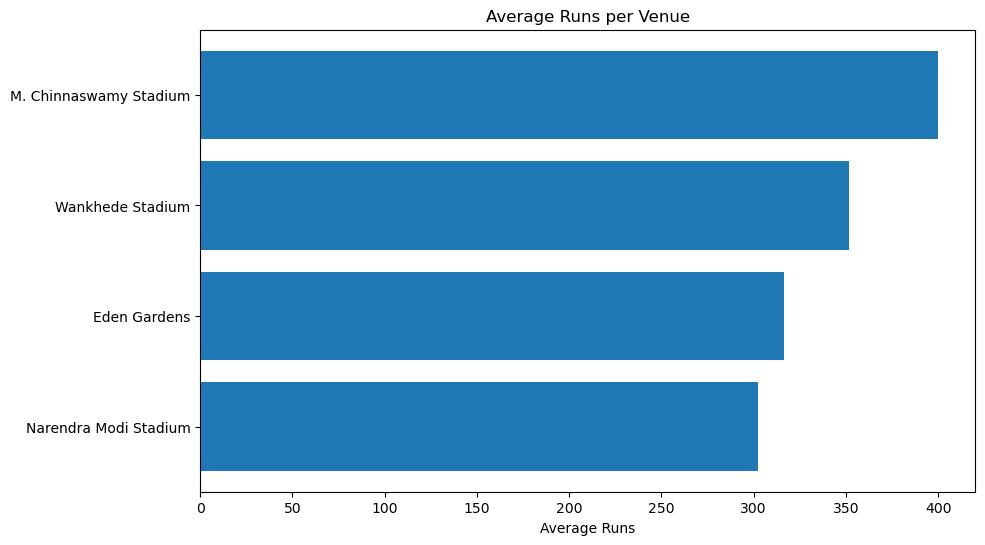

In [21]:
# Topic 3 : Venue Score Analysis
import pandas as pd
df = pd.read_csv('venue_scores_sample.csv')
df.head(5)
# Average score per venue
venue_avg = df.groupby('venue')['total_runs'].mean().sort_values(ascending = False)
print(venue_avg)

# Bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(venue_avg.index, venue_avg.values)
plt.xlabel("Average Runs")
plt.title("Average Runs per Venue")
plt.gca().invert_yaxis()
plt.show()



team
Mumbai Indians                 187.5
Rajasthan Royals               178.0
Chennai Super Kings            175.0
Delhi Capitals                 175.0
Punjab Kings                   168.0
Royal Challengers Bangalore    165.0
Kolkata Knight Riders          160.0
Sunrisers Hyderabad            155.0
Name: total_runs, dtype: float64


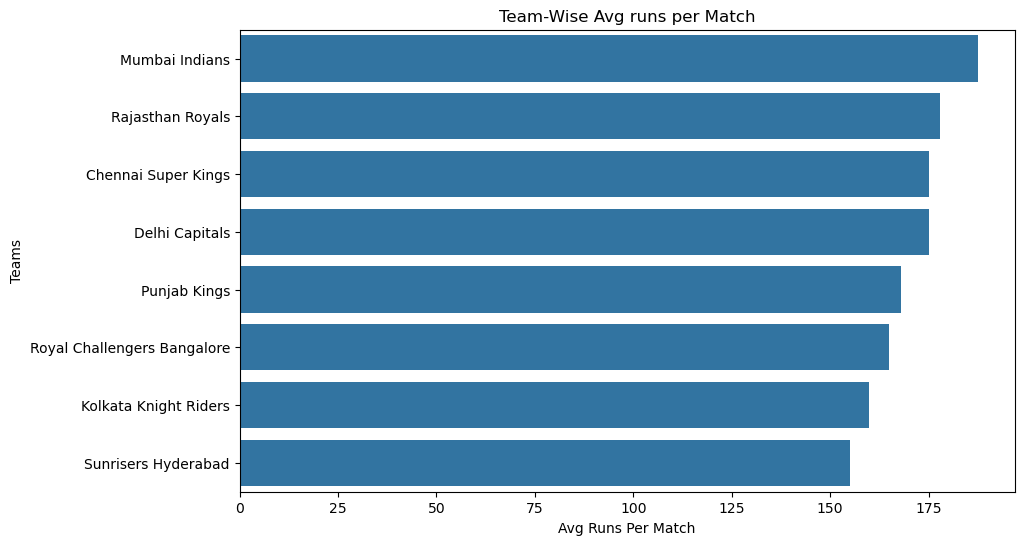

In [42]:
# Topic 4: Average Runs per Team per Match
import pandas as pd
df = pd.read_csv('team_runs_sample.csv')
df.head(5)
team_avg_runs = df.groupby('team')['total_runs'].mean().sort_values(ascending= False)
print(team_avg_runs)
# Bar Plot
import matplotlib as pyplot
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=team_avg_runs.values,y=team_avg_runs.index)
plt.xlabel("Avg Runs Per Match")
plt.ylabel("Teams")
plt.title("Team-Wise Avg runs per Match")
plt.show()

In [43]:
# Topic 5: Team Win % Bar Plot
# Topic 6 (Heatmap: Team vs Venue Win Rates)?

                    team                   venue  matches_played  wins  \
0         Mumbai Indians        Wankhede Stadium              10     7   
1         Mumbai Indians            Eden Gardens               8     4   
2    Chennai Super Kings        Wankhede Stadium               9     6   
3    Chennai Super Kings  M. Chinnaswamy Stadium               7     5   
4  Kolkata Knight Riders            Eden Gardens              10     5   

   win_percentage  
0       70.000000  
1       50.000000  
2       66.666667  
3       71.428571  
4       50.000000  


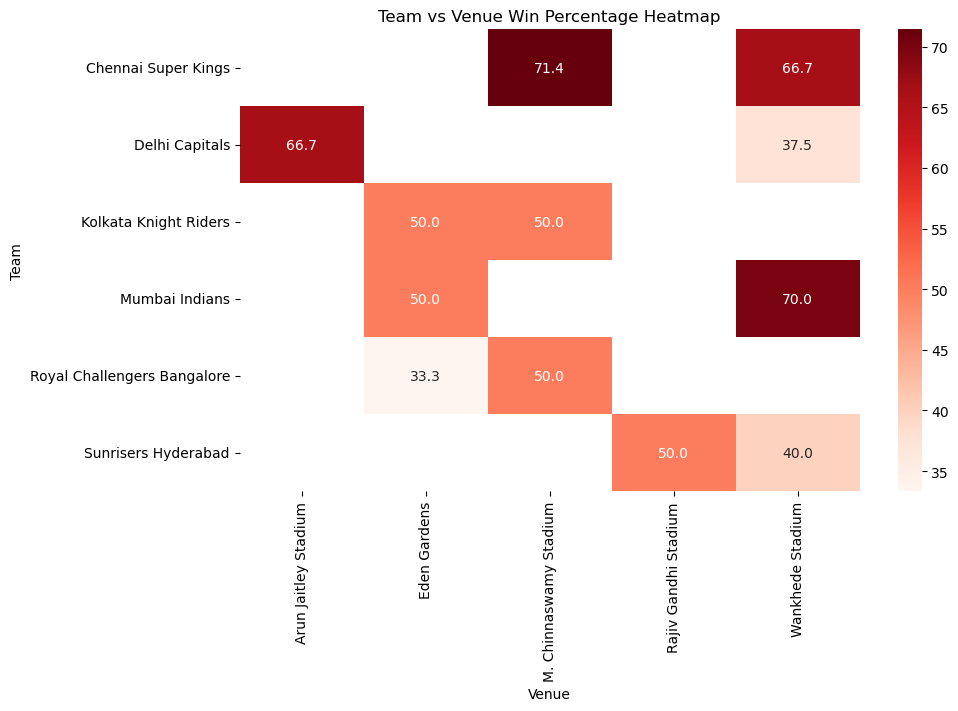

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("team_venue_winrate_sample.csv")
print(df.head(5))

# Create pivot table
pivot = df.pivot_table(values='win_percentage', index='team', columns='venue')

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Reds")
plt.title("Team vs Venue Win Percentage Heatmap")
plt.xlabel("Venue")
plt.ylabel("Team")
plt.show()
